## **Classification I (Decision Trees)**
<hr/>

Submitted by <br>
**Jasleen Kaur Sondhi** <br>
 

<hr>



## Lab Overview  
### Objectives

In this lab, we will learn how to work with a Decision Tree problem.

We will do the following-

- Perform Classification using Decision Trees.<br>
- Demonstrate Multiple Datasets, do the necessary EDA and show various evaluation metrics.


### Sections
For this lab, the sections are -
1. Importing Required Libraries
3. Loading Data
3. EDA on the data
2. Feature Selection
3. Splitting Data
4. Evaluating Model
5. Visualizing Decision Trees
6. Using the model on multiple data sets
7. Comparing the results of all the data sets
8. Conclusion


## References
1. https://www.datacamp.com/community/tutorials/decision-tree-classification-python
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
3. https://plotly.com/python/


### Problem Definition
Learning how to use Decision Trees on different dataset. 

### Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

### Loading Data

In [2]:
# load dataset
pima = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

### EDA on the dataset

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima.duplicated().sum()

0

In [7]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

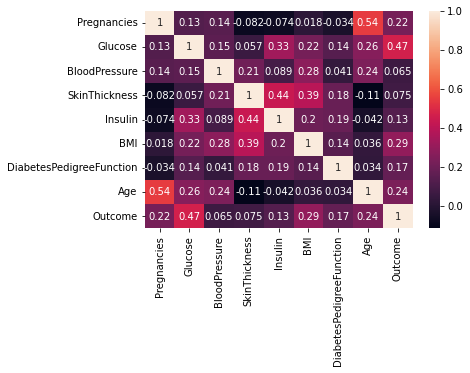

In [9]:
corr=pima.corr()
sns.heatmap(corr, annot=True)

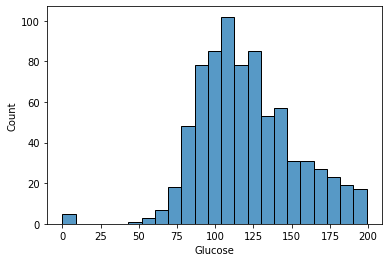

In [10]:
ax = sns.histplot(pima["Glucose"])
plt.show()

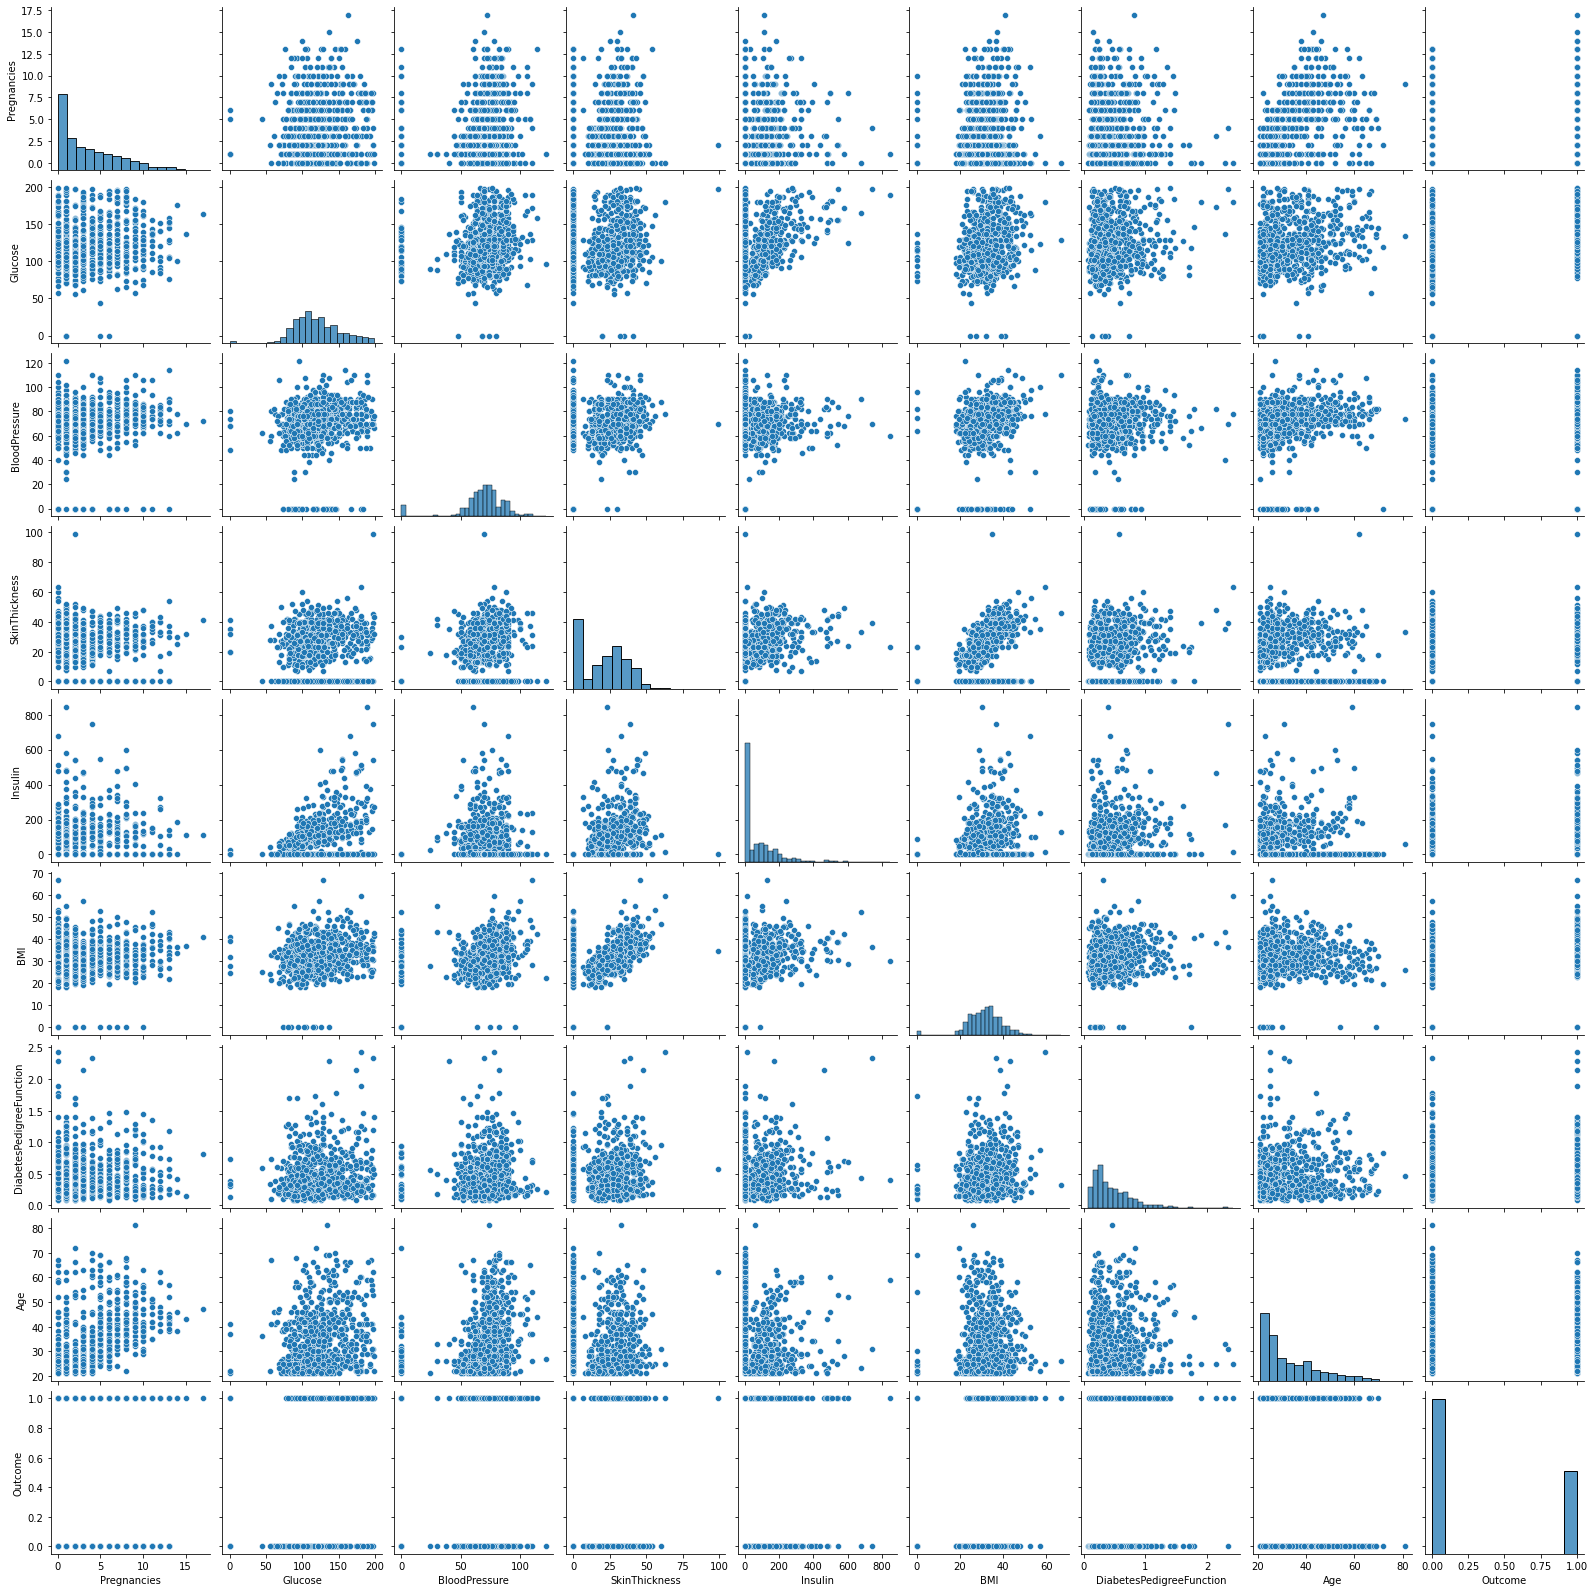

In [11]:
# to visualize how columns are related
sns.pairplot(pima)

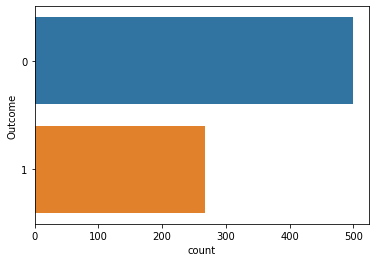

In [12]:
# distribution of the location
ax = sns.countplot(y="Outcome", data=pima)

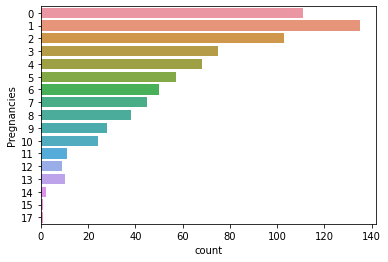

In [13]:
# finding the number of bathrooms present in the data
ax = sns.countplot(y="Pregnancies", data=pima)

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

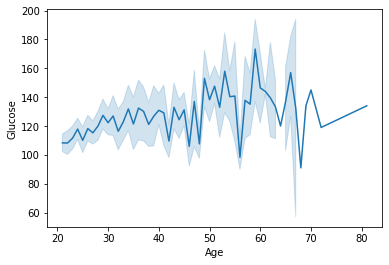

In [14]:
# plot to see the rent trend
sns.lineplot(data=pima, x="Age", y="Glucose")

### Feature Selection

In [15]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

### Splitting Data

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Evaluating Model

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score=r2_score(y_test,y_pred)
print("The value of R squared is ",score)
print("The MSE is=",mean_squared_error(y_test,y_pred))
print("The RMSE value is=",np.sqrt(mean_squared_error(y_test,y_pred)))
score_pima =score
report=classification_report(y_test,y_pred)
print(report)
mat=confusion_matrix(y_test, y_pred)
print(mat)

Accuracy: 0.7705627705627706
The value of R squared is  0.013456889605157452
The MSE is= 0.22943722943722944
The RMSE value is= 0.4789960641145493
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

[[124  22]
 [ 31  54]]


### Visualizing Decision Trees

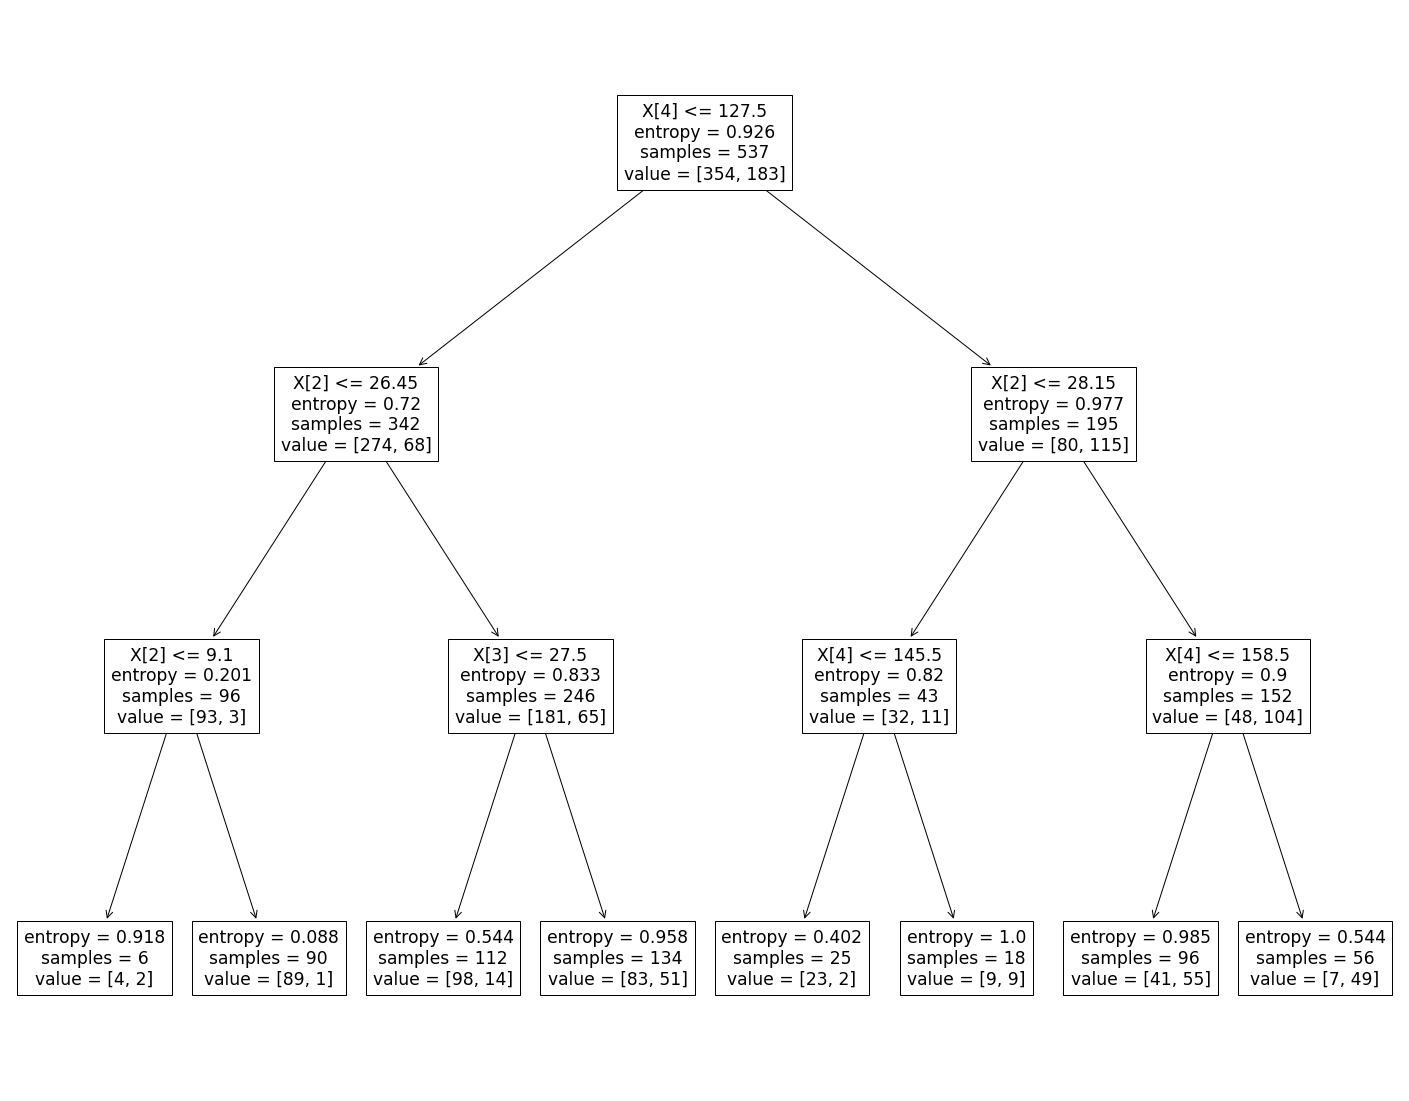

In [18]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

### Using the model on multiple data sets

In [19]:
# creating a function of my decision tree model
def dn_classify(X,y):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
    
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    score=r2_score(y_test,y_pred)
    print("The value of R squared is ",score)
    print("The MSE is=",mean_squared_error(y_test,y_pred))
    print("The RMSE value is=",np.sqrt(mean_squared_error(y_test,y_pred)))
    score1=score
    report=classification_report(y_test,y_pred)
    print(report)
    mat=confusion_matrix(y_test, y_pred)
    print(mat)
    plt.figure(figsize=(25,20))
    tree.plot_tree(clf)
    plt.show()
    return score1


### Iris Data set

In [20]:
# load dataset
iris = pd.read_csv('../input/iris/Iris.csv')

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


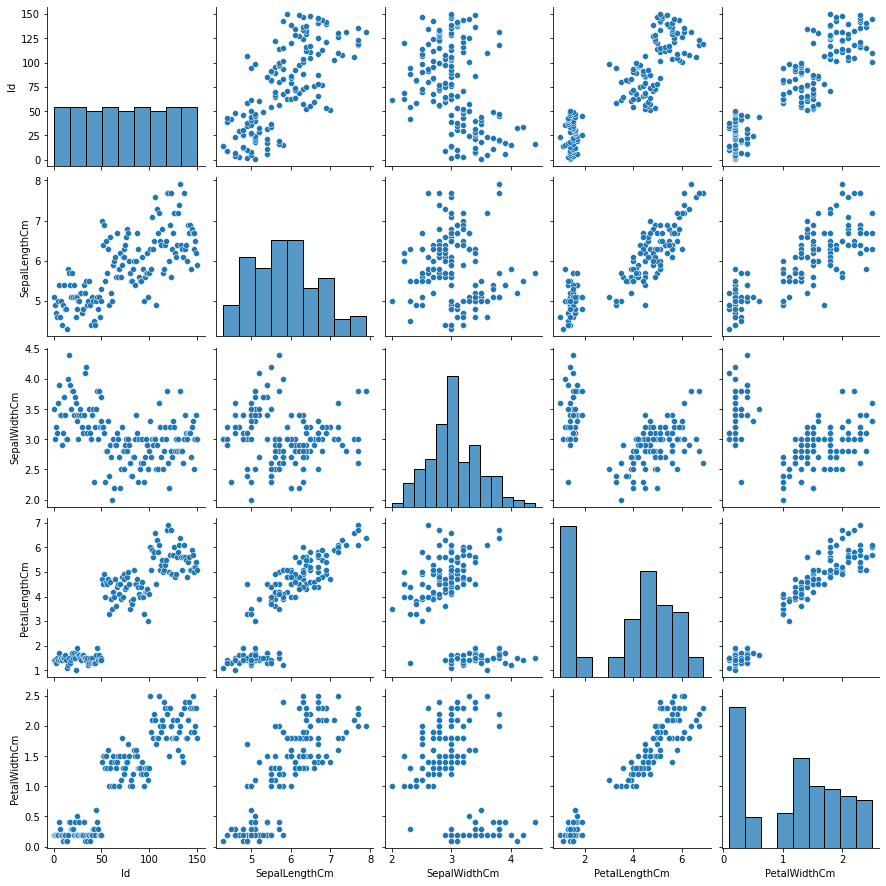

In [22]:
sns.pairplot(iris)

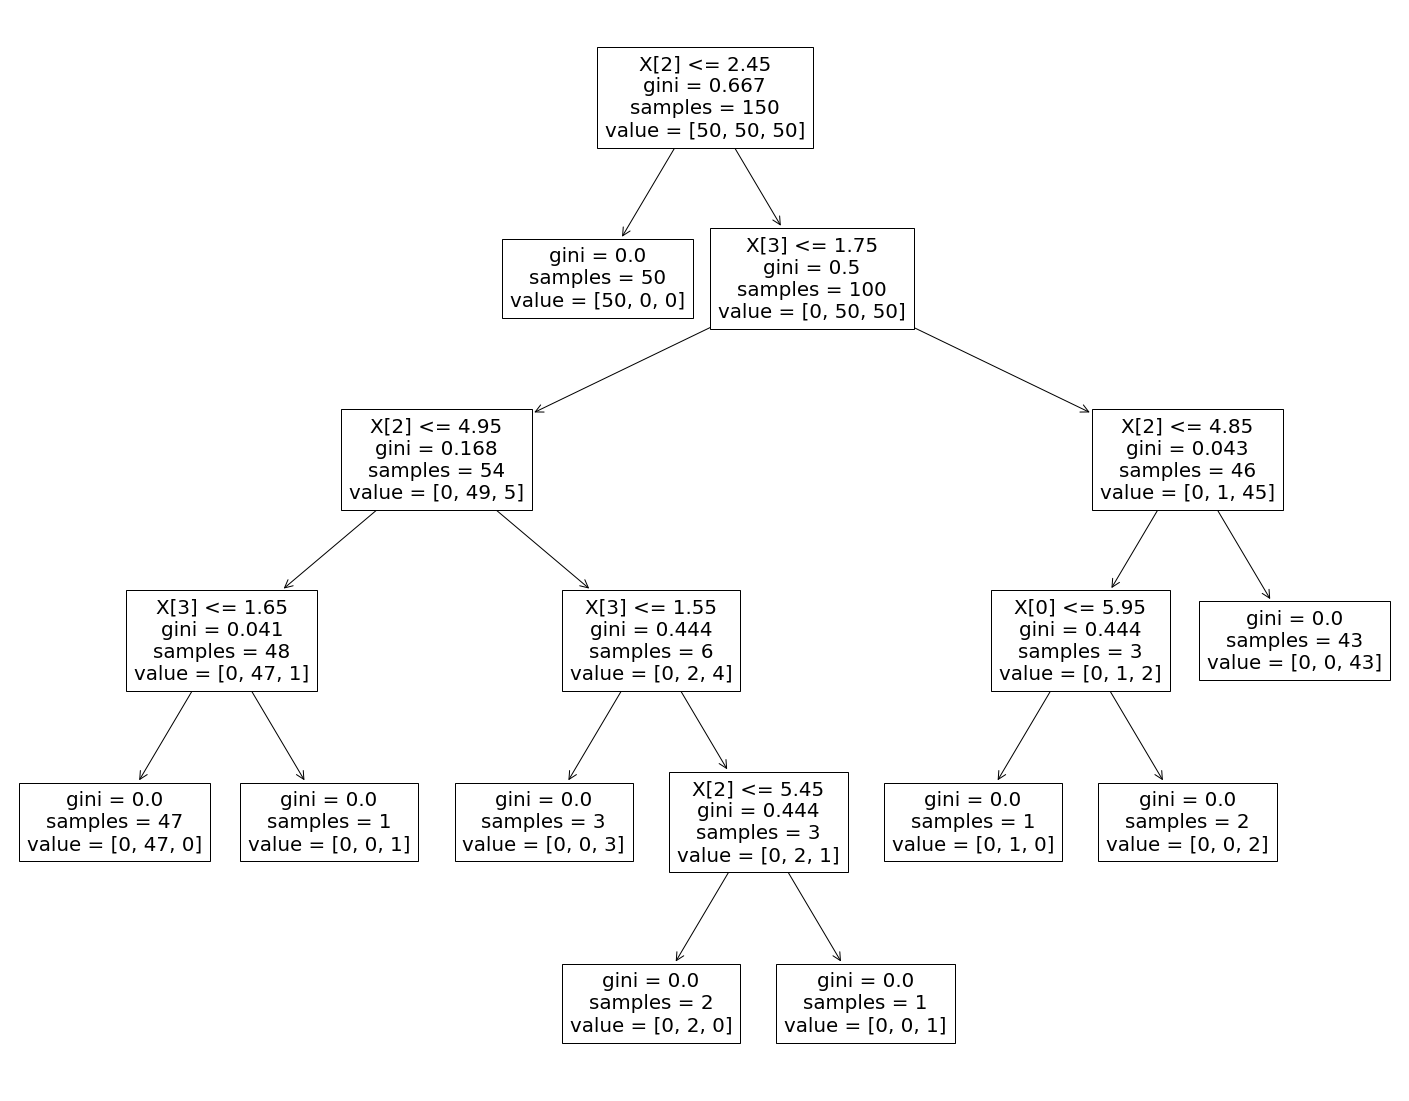

Accuracy: 0.7705627705627706
The value of R squared is  0.013456889605157452
The MSE is= 0.22943722943722944
The RMSE value is= 0.4789960641145493
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

[[124  22]
 [ 31  54]]


In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score=r2_score(y_test,y_pred)
print("The value of R squared is ",score)
print("The MSE is=",mean_squared_error(y_test,y_pred))
print("The RMSE value is=",np.sqrt(mean_squared_error(y_test,y_pred)))
score1=score
report=classification_report(y_test,y_pred)
print(report)
mat=confusion_matrix(y_test, y_pred)
print(mat)

### Red Wine Quality

In [24]:
# load dataset
red = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

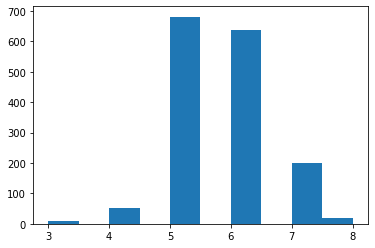

In [25]:
plt.hist(red["quality"])
plt.show()

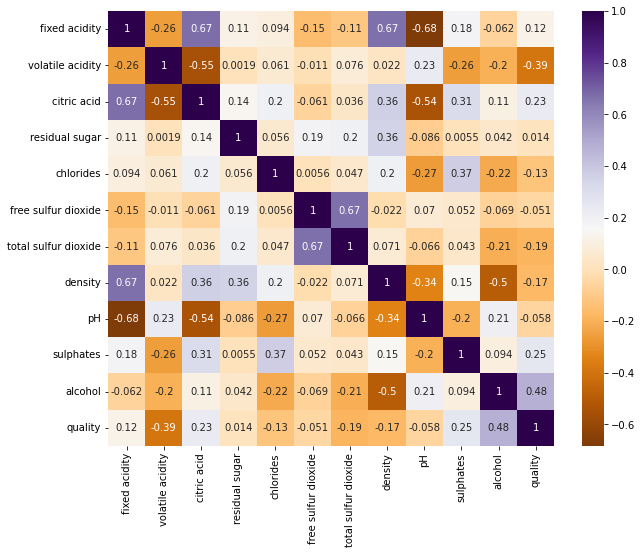

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(red.corr(), annot=True, cmap="PuOr")
plt.show()

In [27]:
red["good_quality"] = [0 if i<7 else 1 for i in red["quality"]]
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


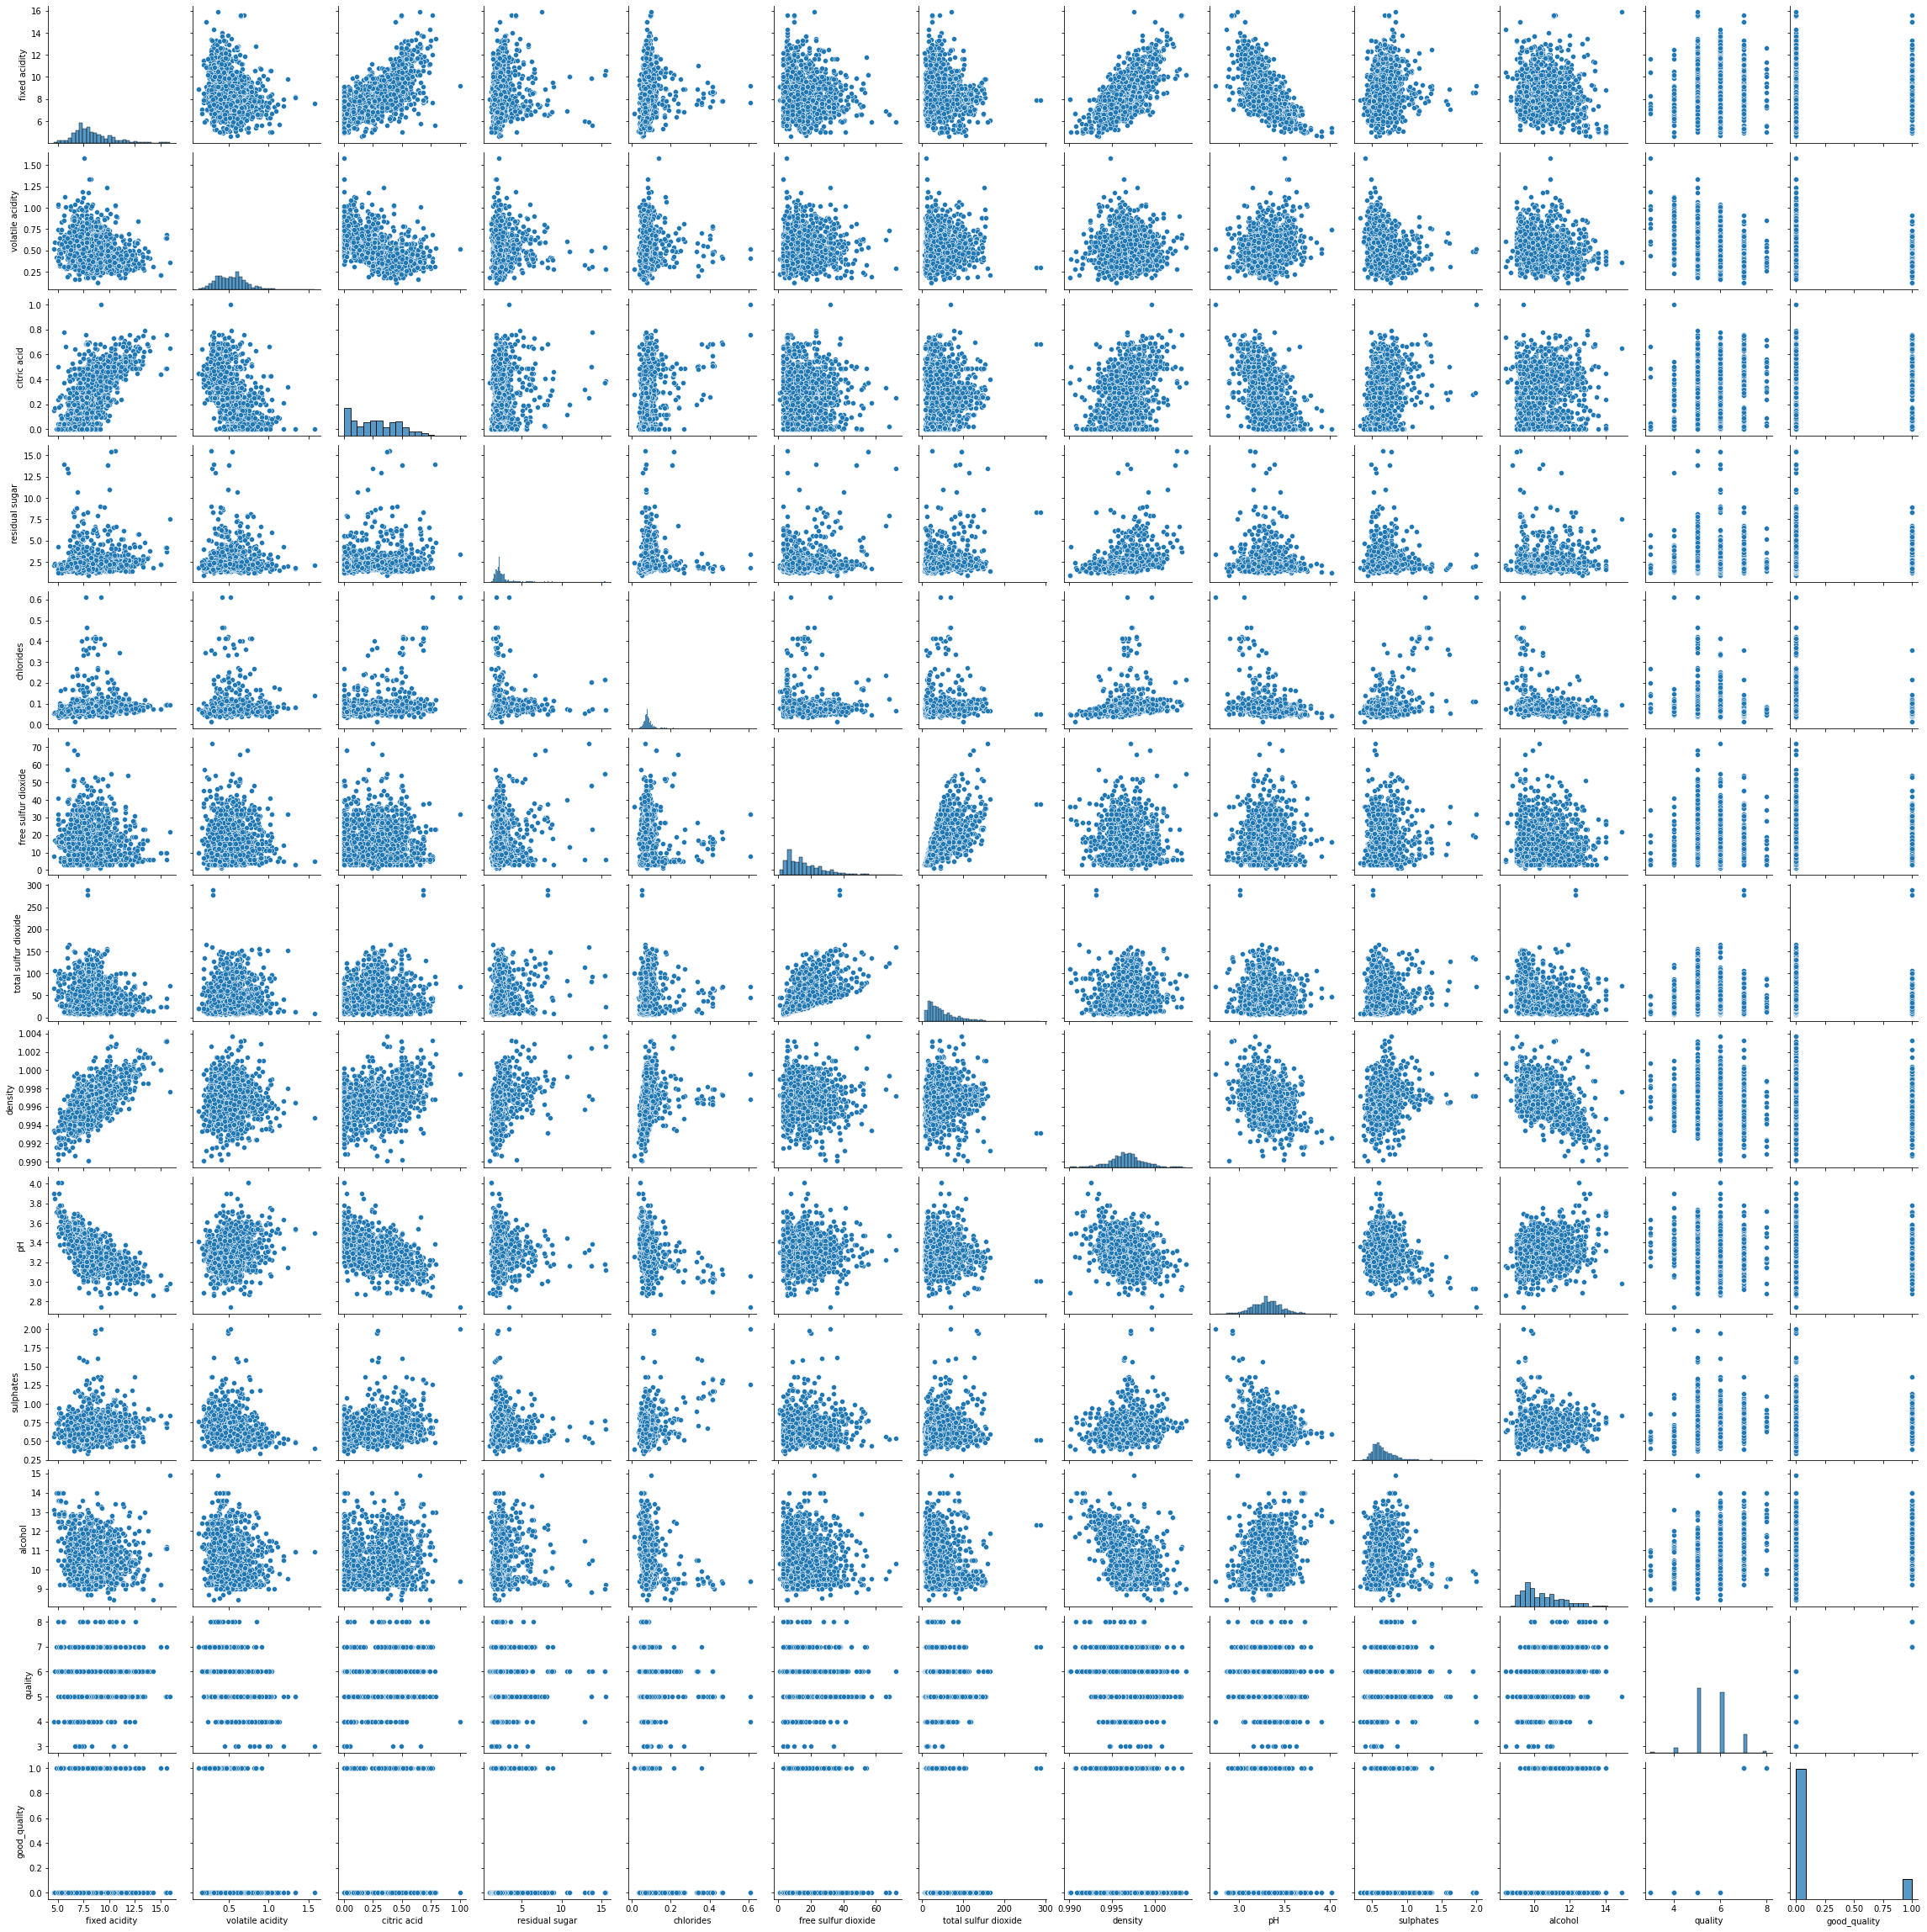

In [28]:
sns.pairplot(red)

In [29]:
red["good_quality"].groupby(red["good_quality"]).count()

good_quality
0    1382
1     217
Name: good_quality, dtype: int64

In [30]:
y = red["good_quality"]
X = red.drop(["good_quality", "quality"], axis=1)

Accuracy: 0.875
The value of R squared is  -0.2320855614973265
The MSE is= 0.125
The RMSE value is= 0.3535533905932738
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       425
           1       0.46      0.47      0.46        55

    accuracy                           0.88       480
   macro avg       0.69      0.70      0.70       480
weighted avg       0.88      0.88      0.88       480

[[394  31]
 [ 29  26]]


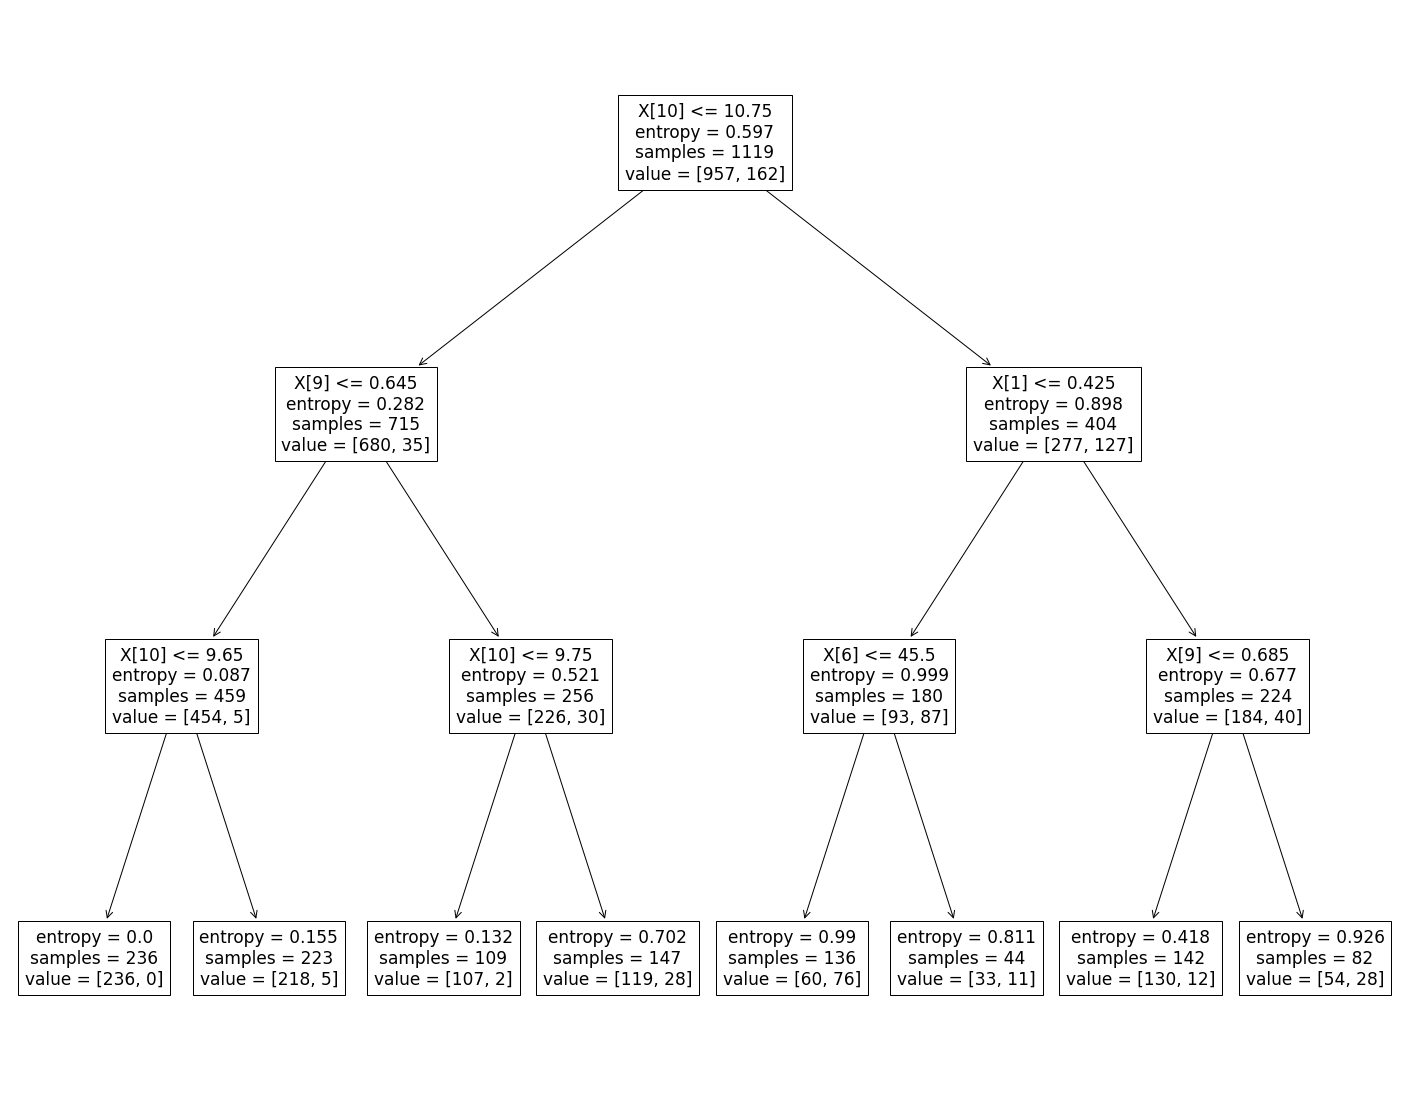

-0.2320855614973265

In [31]:
dn_classify(X,y)

### Comparing the results of all the data sets

In [32]:
scores = pd.DataFrame()
scores['Dataset'] = ['Pima Diabetes',"Iris","Red Wine"]
scores["Accuracy"] = [0.7705*100,0.77*100,0.875*100]
scores.head()

,Dataset,Accuracy
0,Pima Diabetes,77.05
1,Iris,77.00
2,Red Wine,87.50


The best model as per the accuracy is the Linear Regression having the test:train split ratio as 70:30.

## Conclusion/Results

In this lab, I succesfully learned how to perform Decision Tree using the scikit learn library in Python. I was able to classify three datasets- Pima Diabetes, Iris, Red Wine Quality- and predicts its accuracy and other metrics.